<a href="https://colab.research.google.com/github/TalCordova/TensorFlow_Course/blob/main/03_convolutional_neural_networks_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from the food 101 dataset.

However we modified it to only use two classes (pizza & steak) using the image data modification notebook.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-10 06:32:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   240MB/s    in 0.4s    

2022-11-10 06:32:12 (240 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucail step at the beginning of any machine learning project is becoming one with the data.

And for computer vision, this usually means visualizing many samples of your dataset.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find put how many images in a file
num_steaks_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steaks_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the sub-directories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (512, 512, 3)


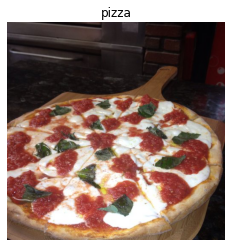

In [ ]:
# View a random image from the train dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
# The images that we've imported and plotted are actually giant arrays\tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[73, 64, 65],
        [74, 65, 66],
        [74, 65, 66],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       [[71, 62, 63],
        [72, 63, 64],
        [72, 63, 64],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       [[71, 62, 63],
        [71, 62, 63],
        [71, 62, 63],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       ...,

       [[28, 14, 13],
        [36, 22, 21],
        [45, 30, 27],
        ...,
        [13, 11, 12],
        [14, 12, 13],
        [16, 12, 13]],

       [[21, 11, 10],
        [22, 10, 10],
        [25, 11, 11],
        ...,
        [12, 10, 11],
        [12, 10, 11],
        [14, 10, 11]],

       [[27, 17, 18],
        [26, 16, 17],
        [27, 15, 15],
        ...,
        [11,  9, 10],
        [11,  9, 10],
        [13,  9, 10]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.28627451, 0.25098039, 0.25490196],
        [0.29019608, 0.25490196, 0.25882353],
        [0.29019608, 0.25490196, 0.25882353],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       [[0.27843137, 0.24313725, 0.24705882],
        [0.28235294, 0.24705882, 0.25098039],
        [0.28235294, 0.24705882, 0.25098039],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       [[0.27843137, 0.24313725, 0.24705882],
        [0.27843137, 0.24313725, 0.24705882],
        [0.27843137, 0.24313725, 0.24705882],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       ...,

       [[0.10980392, 0.05490196, 0.05098039],
        [0.14117647, 0.08627451, 0.08235294],
        [0.17647059, 0

## An end-to-end example

Let's build a convolutional neural network to find patters in our images, more specifically we need a way to:

* Learn our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalizing)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directoris and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile our CNN
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 217ms/step - loss: 0.5582 - accuracy: 0.6973 - val_loss: 0.3938 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4206 - accuracy: 0.8107 - val_loss: 0.3599 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3971 - accuracy: 0.8313 - val_loss: 0.3760 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3696 - accuracy: 0.8407 - val_loss: 0.3418 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3233 - accuracy: 0.8687 - val_loss: 0.3624 - val_accuracy: 0.8260


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Use the same model as before

Let's replicate the model we built in a previous section to see if it works with our image data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model to replicate the TensorFlow playgorund model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 1.2706 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than CNN (model_1), model_2 preforms terribly... let's try and improve it

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 2.6268 - accuracy: 0.6187 - val_loss: 1.0832 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.9545 - accuracy: 0.6913 - val_loss: 0.8964 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5211 - accuracy: 0.7633 - val_loss: 0.5337 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6100 - accuracy: 0.7413 - val_loss: 0.4435 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.7260 - accuracy: 0.7273 - val_loss: 0.7118 - val_accuracy: 0.6820


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down:

1. Become one with the data.
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Create a model (start with a baseline.
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repaet until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

Image shape: (512, 384, 3)
Image shape: (383, 512, 3)


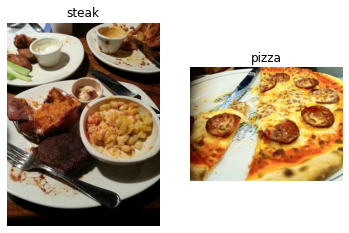

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
staek_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define the directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next steps is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at a one time, a model might only look at 32 at once.

It does this for a couple of reason:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being to learn very well.

Why 32?

Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories and turen them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory od images
                                               target_size = (224, 224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32) # size of mini-batches to load data into
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data catch
images, labels = train_data.next() # get the next natch of images\labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline).

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
# Make the creating of our model a littke easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a three layer convolutional network)
model_4 = Sequential([
    Conv2D(filters = 10, # filters is the number of sliding windows going across the input (higher is more complex)
           kernel_size = 3, # the size of the sliding window going across the input
           strides = 1, # the size of the step the sliding window takes across an input
           padding = "valid", # if "same", output shape is same as input shape, if "valid" output gets compressed
           activation = "relu",
           input_shape = (224,224,3)), # input layer - specify input shape
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the length of training of test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and samples
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),) 

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4935 - accuracy: 0.7733 - val_loss: 0.3821 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3521 - accuracy: 0.8580 - val_loss: 0.3904 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.2121 - accuracy: 0.9327 - val_loss: 0.3796 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.0673 - accuracy: 0.9827 - val_loss: 0.4959 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.0184 - accuracy: 0.9973 - val_loss: 0.6899 - val_accuracy: 0.8040


### 5. Evaluating the model

It looks like our model is learning something, let's evaluate our model.

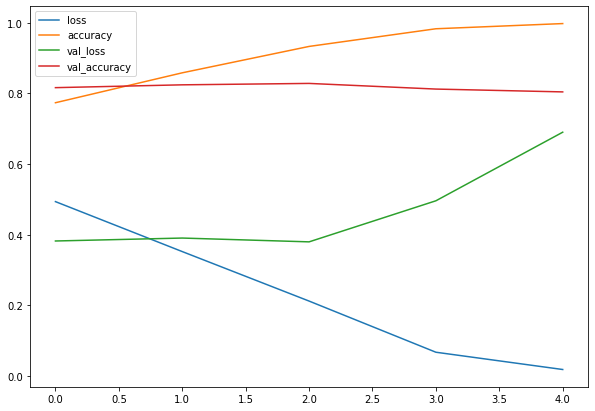

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot Loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

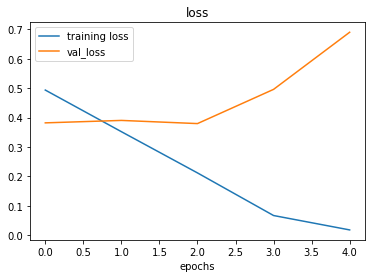

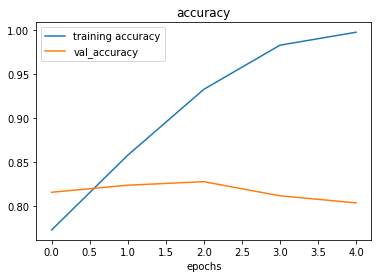

In [ ]:
# Chceck out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number if conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6580 - accuracy: 0.6153 - val_loss: 0.5035 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 12s 251ms/step - loss: 0.4475 - accuracy: 0.7940 - val_loss: 0.3470 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4216 - accuracy: 0.8093 - val_loss: 0.4099 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4026 - accuracy: 0.8273 - val_loss: 0.3463 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3637 - accuracy: 0.8433 - val_loss: 0.3075 - val_accuracy: 0.8880


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

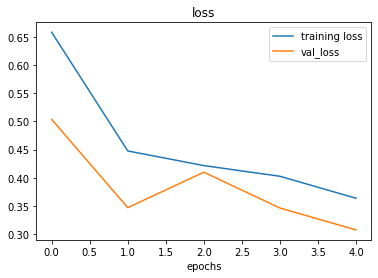

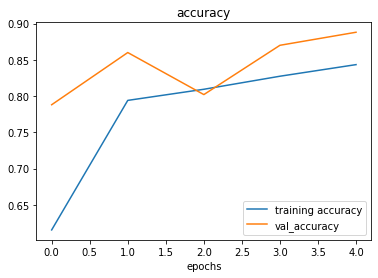

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImgaeDataGenerator training instance with data augmentation
training_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                                rotation_range = 0.2, # how much do you want to rotate an image?
                                                shear_range = 0.2, # how much do you want to shear an image
                                                zoom_range = 0.2, # zoom in randomly on an image
                                                width_shift_range = 0.2, # move around an image horizontally
                                                height_shift_range = 0.2, # move around an image vertically
                                                horizontal_flip = True) # do you want to flip an image?

# Create ImgaeDataGenerator without data augmantation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = training_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224,224),
                                                                      batch_size = 32,
                                                                      class_mode = "binary",
                                                                      shuffle = False) # for demonstariton purpose only

# Crate non-augmented train data_batches
print("Non augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

# Create non-augmented test data batches
print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented tst data:
Found 500 images belonging to 2 classes.


Finally.. let's visualize some augmented data

In [ ]:
# Get some augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented

Showing image number: 17


(-0.5, 223.5, 223.5, -0.5)

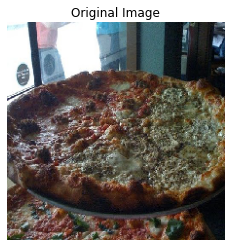

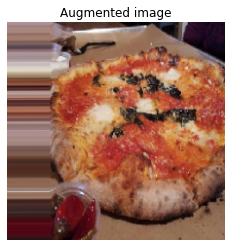

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Complie the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented train data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 503ms/step - loss: 0.7211 - accuracy: 0.4700 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6888 - accuracy: 0.5680 - val_loss: 0.6790 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6945 - accuracy: 0.6087 - val_loss: 0.6695 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6912 - accuracy: 0.5673 - val_loss: 0.6569 - val_accuracy: 0.5920
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6826 - accuracy: 0.5573 - val_loss: 0.6473 - val_accuracy: 0.8020


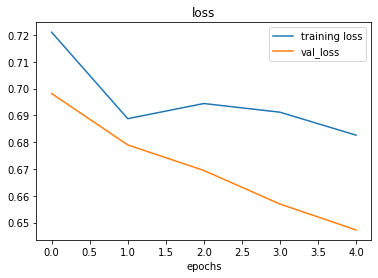

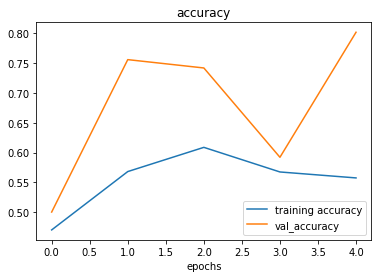

In [ ]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our training and augmented training data and train another model (the same as before) and see what happens.

In [ ]:
# Import data and augment it from training directory
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                                  target_size = (224, 224),
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle = True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 & model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.6102 - accuracy: 0.6527 - val_loss: 0.4794 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4631 - accuracy: 0.7853 - val_loss: 0.3732 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4371 - accuracy: 0.8027 - val_loss: 0.3757 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4009 - accuracy: 0.8187 - val_loss: 0.4260 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3839 - accuracy: 0.8327 - val_loss: 0.3467 - val_accuracy: 0.8460


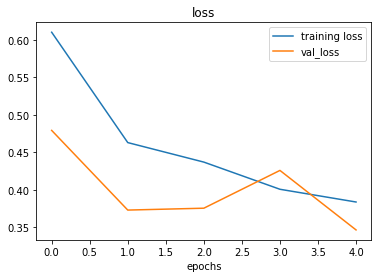

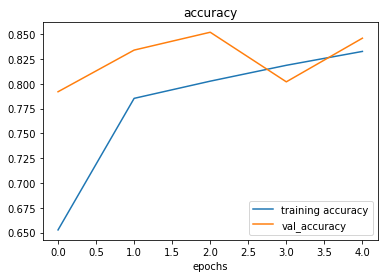

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there a few things we could try to continue to improve our model:

* Increase the numbder of model layers (e.g. more `Conv2D`/`MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Unse **transfer learning** to leverage what another image model has learn and adjust it to our own use case.

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# !wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

UnidentifiedImageError: ignored

In [12]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]